### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1.	Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2.	Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3.	blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4.	blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5.	blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6.	blueKills : Jumlah musuh yang dibunuh oleh tim biru
7.	blueDeaths : Jumlah kematian (tim biru)
8.	blueAssists : Jumlah assist kill (tim biru)
9.	blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10.	blueDragons : Jumlah naga yang dibunuh oleh tim biru
11.	blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12.	blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13.	blueTotalGold : Tim biru total emas
14.	blueAvgLevel : Tingkat juara rata-rata tim biru
15.	blueTotalExperience : Pengalaman total tim biru
16.	blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17.	blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18.	blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19.	blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20.	blueCSPerMin : CS tim biru (antek) per menit
21.	blueGoldPerMin : Emas tim biru per menit
22.	redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23.	redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24.	redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25.	redKills : Jumlah musuh yang dibunuh oleh tim merah
26.	redDeaths : Jumlah kematian (tim merah)
27.	redAssists: Jumlah assist kill (tim merah)
28.	redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29.	redDragons : Jumlah naga yang dibunuh oleh tim merah
30.	redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31.	redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32.	redTotalGold: Tim merah total emas
33.	redAvgLevel: Tingkat juara rata-rata tim merah
34.	redTotalExperience: Pengalaman total tim merah
35.	redTotalMinionsKilled : Total minion tim merah tewas (CS)
36.	redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37.	redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38.	redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39.	redCSPerMin : CS tim merah (antek) per menit
40.	redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
# Checking the shape of the data
df.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [4]:
# Checking null values
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [5]:
# checking data types of the columns
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [6]:
#checking for quasi constants
from fast_ml.feature_selection import get_constant_features

constant_features = get_constant_features(df, threshold=0.0000001, dropna=False)
constant_features

,Desc,Var,Value,Perc
0,Quasi Constant,redTowersDestroyed,0.000000e+00,95.991497
1,Quasi Constant,blueTowersDestroyed,0.000000e+00,95.303168
2,Quasi Constant,redHeralds,0.000000e+00,83.996356
3,Quasi Constant,blueHeralds,0.000000e+00,81.202551
4,Quasi Constant,blueDragons,0.000000e+00,63.802004
5,Quasi Constant,redDragons,0.000000e+00,58.690151
6,Quasi Constant,blueEliteMonsters,0.000000e+00,52.191517
7,Quasi Constant,redFirstBlood,0.000000e+00,50.480818
8,Quasi Constant,blueFirstBlood,1.000000e+00,50.480818
9,Quasi Constant,blueWins,0.000000e+00,50.096164


In [7]:
# Ambang batas variabilitas yang dianggap quasi constant
threshold = 0.9

# Menghitung variabilitas setiap kolom (proporsi nilai unik)
variance_ratios = df.nunique() / len(df)

# Identifikasi kolom-kolom quasi constant
quasi_constants = variance_ratios[variance_ratios <= threshold]

print("Kolom-kolom quasi constant:")
print(quasi_constants)

Kolom-kolom quasi constant:
blueWins                        0.000202
blueWardsPlaced                 0.014880
blueWardsDestroyed              0.002733
blueFirstBlood                  0.000202
blueKills                       0.002126
blueDeaths                      0.002126
blueAssists                     0.003037
blueEliteMonsters               0.000304
blueDragons                     0.000202
blueHeralds                     0.000202
blueTowersDestroyed             0.000506
blueTotalGold                   0.479704
blueAvgLevel                    0.001721
blueTotalExperience             0.419374
blueTotalMinionsKilled          0.014981
blueTotalJungleMinionsKilled    0.007491
blueGoldDiff                    0.612106
blueExperienceDiff              0.542160
blueCSPerMin                    0.014981
blueGoldPerMin                  0.479704
redWardsPlaced                  0.015285
redWardsDestroyed               0.002531
redFirstBlood                   0.000202
redKills                     

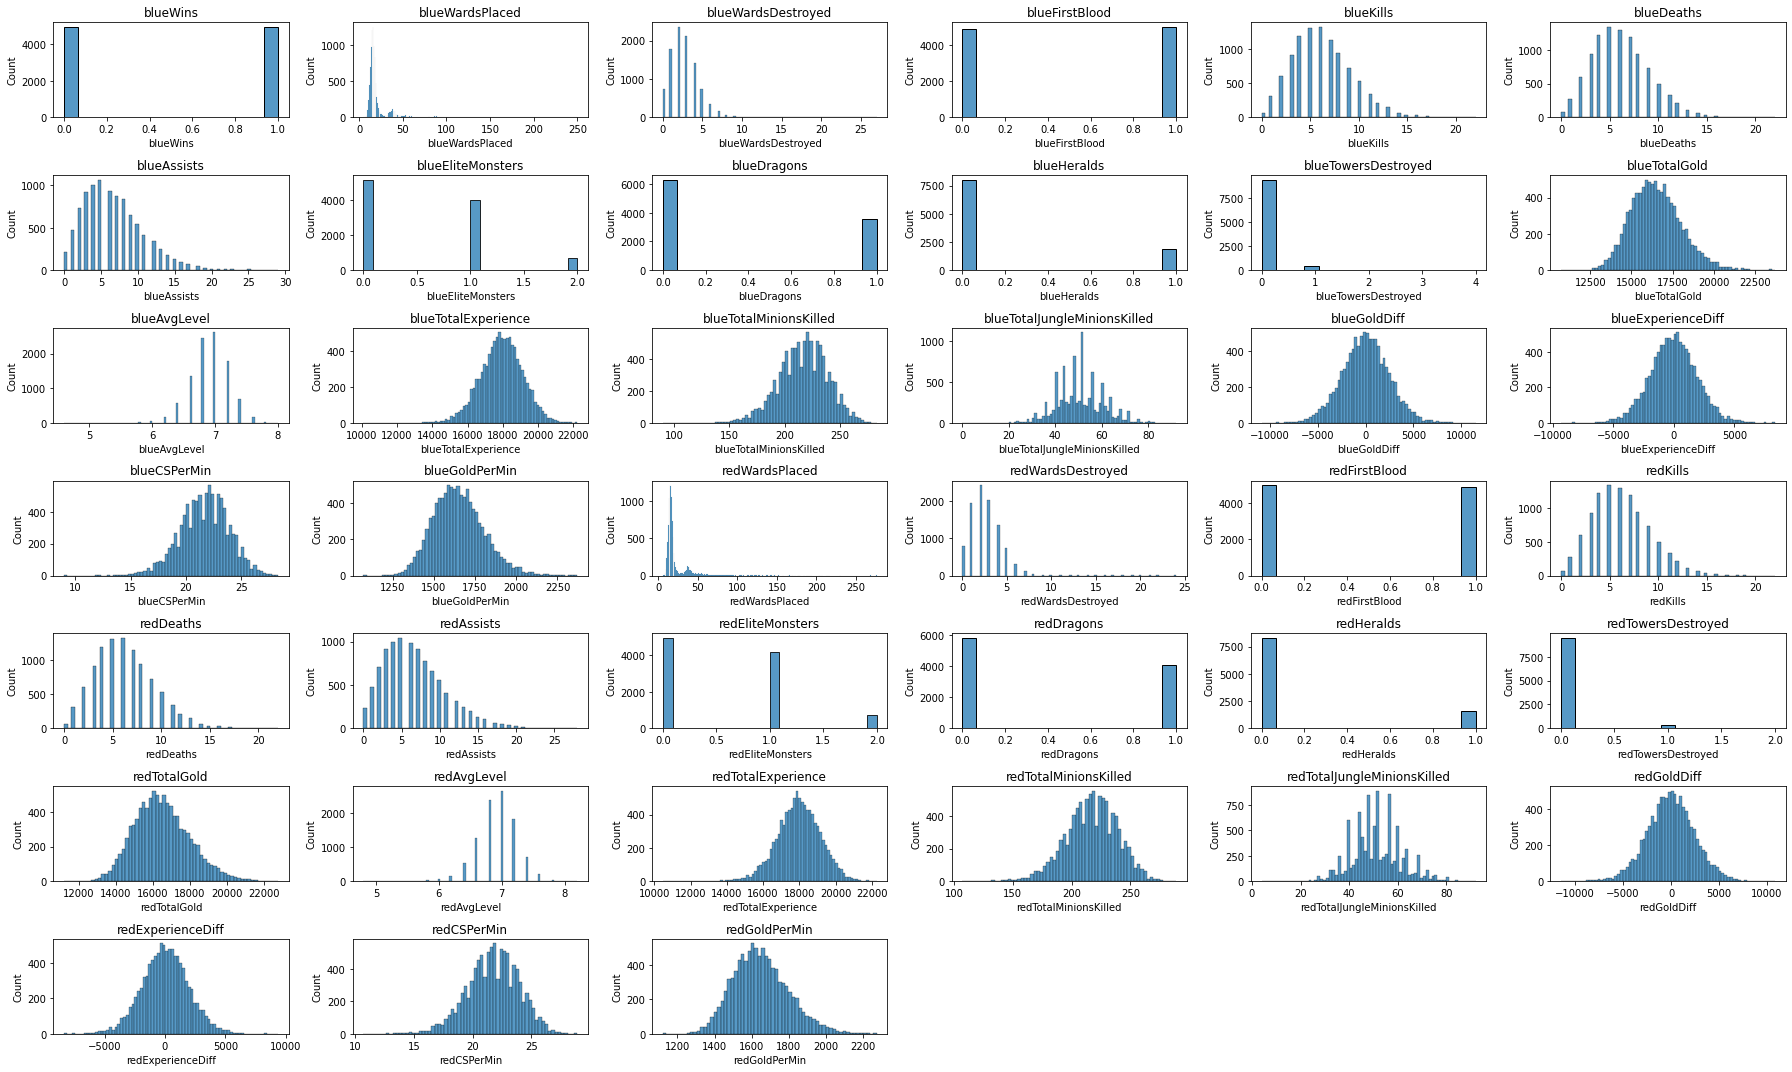

In [8]:
data = df.iloc[:,1:]

rows = 7
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(25, 15))

# Melakukan flatten pada axes supaya mempermudah iterasi
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(data.columns):
        sns.histplot(data=data, x=data.columns[i], ax=ax)
        ax.set_title(data.columns[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
# Value counts data blueWins
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

# Buatlah catatan dari hasil data preprocessing

#### Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = df.iloc[:,1:].columns
df[col] = scaler.fit_transform(df[col])

## 3. Data Splitting into train and test set

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('blueWins', axis=1)
y = df['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Mendapatkan nilai feature importance dari model
feature_importance = clf.feature_importances_

In [13]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False).reset_index().drop('index', axis=1)
feature_importance_df.head(30)

,Feature,Importance
0,redGoldDiff,0.085744
1,blueGoldDiff,0.083517
2,blueExperienceDiff,0.070665
3,redExperienceDiff,0.058352
4,blueTotalGold,0.052604
5,redTotalGold,0.044104
6,redGoldPerMin,0.043254
7,blueGoldPerMin,0.040526
8,redTotalExperience,0.037422
9,blueTotalExperience,0.035514


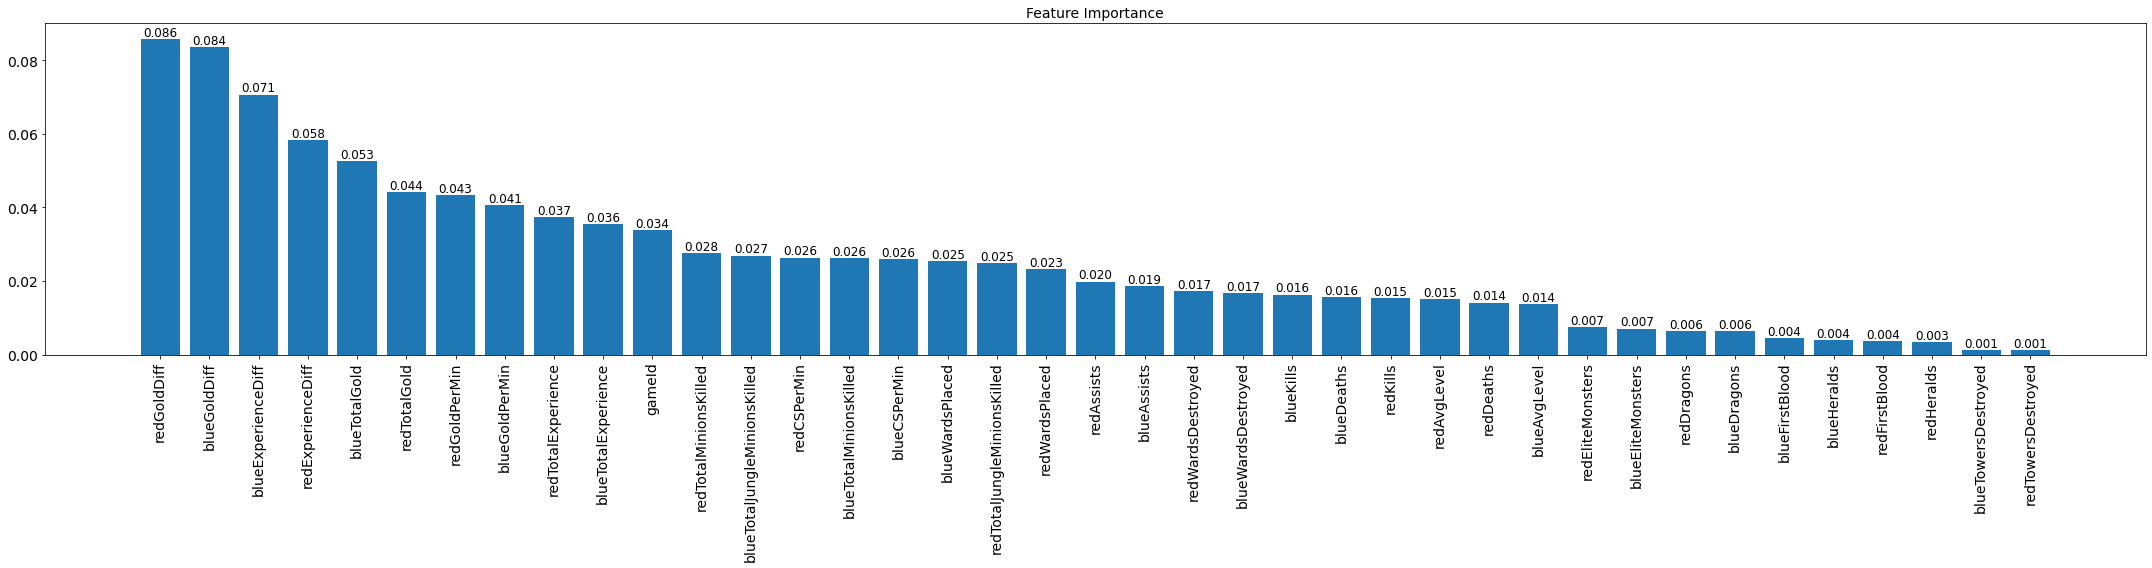

In [14]:
# Urutkan indeks berdasarkan nilai feature_importance dari yang terbesar
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = np.array(feature_importance)[sorted_indices]
sorted_column_names = np.array(X.columns)[sorted_indices]

plt.figure(figsize=(30, 8))
plt.title("Feature Importance", fontsize=14)
bars = plt.bar(range(X.shape[1]), sorted_feature_importance)
plt.xticks(range(X.shape[1]), sorted_column_names, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Tambahkan nilai feature_importance di atas setiap bar
for bar, importance in zip(bars, sorted_feature_importance):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{importance:.3f}', 
             ha='center', va='bottom', fontsize=12)

plt.show()

In [15]:
filtered_X = [
    'blueGoldDiff', 'redGoldDiff',
    'blueExperienceDiff', 'redExperienceDiff',
    'blueTotalGold', 'redTotalGold',
    'blueTotalExperience', 'redTotalExperience',
    'blueGoldPerMin', 'redGoldPerMin',
    'blueKills', 'redKills',
    'blueDeaths', 'redDeaths'
]

In [16]:
filtered_features = feature_importance_df.loc[feature_importance_df['Feature'].isin(filtered_X)]
filtered_features

,Feature,Importance
0,redGoldDiff,0.085744
1,blueGoldDiff,0.083517
2,blueExperienceDiff,0.070665
3,redExperienceDiff,0.058352
4,blueTotalGold,0.052604
5,redTotalGold,0.044104
6,redGoldPerMin,0.043254
7,blueGoldPerMin,0.040526
8,redTotalExperience,0.037422
9,blueTotalExperience,0.035514


In [17]:
df_filtered = df[filtered_X]
df_filtered

,blueGoldDiff,redGoldDiff,blueExperienceDiff,redExperienceDiff,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,blueGoldPerMin,redGoldPerMin,blueKills,redKills,blueDeaths,redDeaths
0,0.514554,0.485446,0.527402,0.472598,0.499576,0.464844,0.572406,0.557608,0.499576,0.464844,0.409091,0.272727,0.272727,0.409091
1,0.355294,0.644706,0.461512,0.538488,0.306993,0.556250,0.508577,0.590732,0.306993,0.556250,0.227273,0.227273,0.227273,0.227273
2,0.433152,0.566848,0.469430,0.530570,0.415003,0.527170,0.504948,0.575144,0.415003,0.527170,0.318182,0.500000,0.500000,0.318182
3,0.426470,0.573530,0.527459,0.472541,0.341300,0.457118,0.647864,0.635039,0.341300,0.457118,0.181818,0.227273,0.227273,0.181818
4,0.440687,0.559313,0.540863,0.459137,0.437129,0.537500,0.696437,0.664859,0.437129,0.537500,0.272727,0.272727,0.272727,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,0.598690,0.401310,0.667496,0.332504,0.542364,0.350174,0.731404,0.511098,0.542364,0.350174,0.318182,0.181818,0.181818,0.318182
9875,0.520788,0.479212,0.578078,0.421922,0.424640,0.368403,0.755154,0.669434,0.424640,0.368403,0.272727,0.181818,0.181818,0.272727
9876,0.377360,0.622640,0.421696,0.578304,0.398813,0.616927,0.654297,0.800068,0.398813,0.616927,0.272727,0.318182,0.318182,0.272727
9877,0.448087,0.551913,0.466489,0.533511,0.287487,0.354688,0.588075,0.664944,0.287487,0.354688,0.090909,0.136364,0.136364,0.090909


1. BlueGoldDiff dan RedGoldDiff -> (0.09 | 0.08)
2. BlueExperienceDiff dan RedExperienceDiff --> (0.07 | 0.06)
3. blueTotalGold dan redTotalGold -> (0.05 | 0.04)
4. blueTotalExperience dan redTotalExperience -> (0.04 | 0.04)
5. blueGoldPerMin dan redGoldPerMin -> (0.04 | 0.04)
6. blueKills dan redKills -> (0.02 | 0.02)
7. blueDeaths dan redDeaths -> (0.02 | 0.02)

Feature Selection using Recursive feature extraction (RFE)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Model Decision Tree untuk Recursive Feature Elimination (RFE)
rfe_dt_model = RandomForestClassifier(random_state=42)
rfe_selector = RFE(rfe_dt_model, n_features_to_select=14)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Membuat model Decision Tree baru dengan fitur terpilih dari RFE
selected_rfe_dt_model = RandomForestClassifier(random_state=42)
selected_rfe_dt_model.fit(X_train_rfe, y_train)

# Melakukan prediksi dan menghitung akurasi pada data uji (RFE)
y_pred_rfe = selected_rfe_dt_model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("Accuracy using RFE:", accuracy_rfe)

Accuracy using RFE: 0.7170040485829959


In [19]:
# Mendapatkan mask dari fitur yang terpilih oleh RFE
selected_features_mask = rfe_selector.support_

# Mendapatkan indeks dari fitur-fitur yang terpilih
selected_features_indices = np.where(selected_features_mask)[0]

# Mendapatkan nama fitur-fitur yang terpilih
selected_feature_names = X.columns[selected_features_indices]

print("Selected Features by RFE:", selected_feature_names)

Selected Features by RFE: Index(['gameId', 'blueTotalGold', 'blueTotalExperience',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redTotalGold', 'redTotalExperience',
       'redTotalMinionsKilled', 'redGoldDiff', 'redExperienceDiff',
       'redGoldPerMin'],
      dtype='object')


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

rfe = RandomForestClassifier()

rfe = RFE(estimator=rfe, n_features_to_select=16, step=1)
rfe.fit(X_train, y_train)

X_train_transform = rfe.transform(X_train)

In [21]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True])

In [22]:
# len(rfe.support_)
len(df.columns[1:])

39

In [23]:
df.columns[1:][rfe.support_]

Index(['blueWins', 'blueTotalGold', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin',
       'redTotalGold', 'redTotalExperience', 'redTotalJungleMinionsKilled',
       'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## 5. Modelling and Evaluation

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Atur parameter tampilan sesuai keinginan Anda
disp.plot(cmap=plt.cm.Blues, values_format='d')  # cmap mengontrol skala warna, values_format mengontrol format teks
disp.ax_.set_title('Confusion Matrix')

In [162]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Function to display accuracy, precision, f-1 score
def evaluation_metrics_score(y_pred) :
    
    cm = confusion_matrix(y_test, y_pred)

    # Set theme color and figsize
    plt.figure(figsize=(10, 10)) 
    display = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Set the theme color (e.g., using cmap)
    display.plot(cmap='rocket_r')  
    plt.title('Confusion Matrix')
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"~ ~ Evaluation Metrics Score ~ ~")
    print(f"Precision: {np.round(precision, 3) * 100}")
    print(f"Accuracy: {np.round(accuracy, 3) * 100}")
    print(f"F1 Score: {np.round(f1, 3) * 100}")

### KNN

In [24]:
df_test = df[filtered_X]
df_test['blueWins'] = y

C:\Users\marse\AppData\Local\Temp\ipykernel_1148\675930151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['blueWins'] = y


In [25]:
X = df_test.drop('blueWins', axis=1)
y = df_test['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = np.round(accuracy_score(y_test, y_pred_knn), 4) * 100

~ ~ Evaluation Metrics Score ~ ~
Precision: 67.9
Accuracy: 68.4
F1 Score: 68.4


<Figure size 720x720 with 0 Axes>

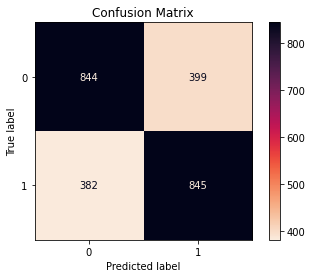

In [163]:
evaluation_metrics_score(y_pred_knn)

### Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000) 
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = np.round(accuracy_score(y_test, y_pred_lr), 4) * 100

~ ~ Evaluation Metrics Score ~ ~
Precision: 70.89999999999999
Accuracy: 71.7
F1 Score: 72.0


<Figure size 720x720 with 0 Axes>

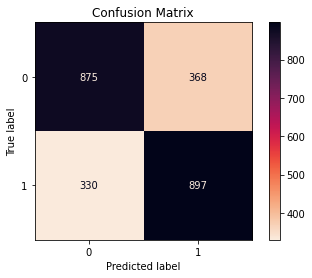

In [164]:
evaluation_metrics_score(y_pred_lr)

### Decision Tree Classification

In [127]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = np.round(accuracy_score(y_test, y_pred_dtc), 4) * 100

~ ~ Evaluation Metrics Score ~ ~
Precision: 63.0
Accuracy: 63.0
F1 Score: 62.4


<Figure size 720x720 with 0 Axes>

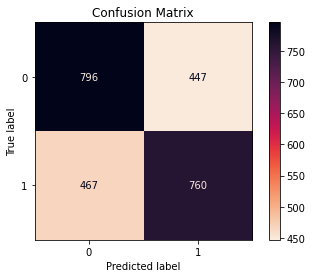

In [165]:
evaluation_metrics_score(y_pred_dtc)

### Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = np.round(accuracy_score(y_test, y_pred_rfc), 4) * 100

~ ~ Evaluation Metrics Score ~ ~
Precision: 70.19999999999999
Accuracy: 70.8
F1 Score: 70.8


<Figure size 720x720 with 0 Axes>

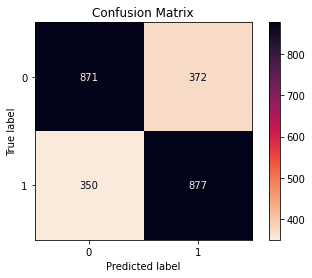

In [166]:
evaluation_metrics_score(y_pred_rfc)

### Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = np.round(accuracy_score(y_test, y_pred_nb), 4) * 100

In [132]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

accuracy_mnb = np.round(accuracy_score(y_test, y_pred_mnb), 4) * 100

In [133]:
accuracy_mnb

71.46000000000001

~ ~ Evaluation Metrics Score ~ ~
Precision: 71.3
Accuracy: 72.0
F1 Score: 72.1


<Figure size 720x720 with 0 Axes>

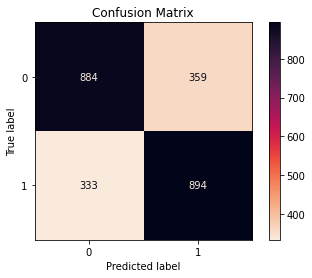

In [167]:
evaluation_metrics_score(y_pred_nb)

### Gradient Boosting 

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

accuracy_gbc = np.round(accuracy_score(y_test, y_pred_gbc), 4) * 100

~ ~ Evaluation Metrics Score ~ ~
Precision: 70.8
Accuracy: 71.7
F1 Score: 72.0


<Figure size 720x720 with 0 Axes>

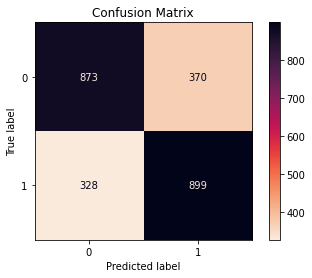

In [168]:
evaluation_metrics_score(y_pred_gbc)

### Evaluation

In [131]:
df_accuracy_score = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'],
    'Accuracy Score' : [accuracy_knn, accuracy_lr, accuracy_dtc, accuracy_rfc, accuracy_nb, accuracy_gbc]
})

df_accuracy_score.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

,Model,Accuracy Score
0,Naive Bayes,71.98
1,Logistic Regression,71.74
2,Gradient Boosting,71.74
3,Random Forest,70.77
4,KNN,68.38
5,Decision Tree,63.00


In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan skor terbaik
print(f"Hyperparameter terbaik: {grid_search.best_params_}")
print(f"Skor terbaik: {np.round(grid_search.best_score_, 3) * 100}")

Hyperparameter terbaik: {'var_smoothing': 1e-09}
Skor terbaik: 72.89999999999999


<b>Kesimpulan</b> :

Berdasarkan dataframe diatas, dapat dilihat bahwa model dengan accuracy score tertinggi adalah <b>Naive Bayes</b> yaitu di angka 71.98 %. Dimana score ini tanpa melakukan hyperparameter tuning & cross validation.

Setelah dilakukan hyperparameter tuning & cross validation. Score accuracy yang didapat menjadi 72.89 %, yaitu terjadi kenaikan 1 %. Namun supaya score accuracy-nya lebih baik lagi, harus dicari parameter yang terbaik lagi. Karena parameter yang saya gunakan, hanya parameter 'var_smoothing'. Jadi harus ditambah lagi & disesuaikan lagi dengan data yang digunakan.

=> Oleh karena itu, model yang disarankan atau terbaik yang digunakan adalah model <u>Naive Bayes</u>